In [16]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
df=pd.read_excel('perrinchampagne.xls')
df.head()

,Month,Perrin Freres monthly champagne sales millions ’64-’72
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [42]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ’64-’72
100,1972-05-01,4618
101,1972-06-01,5312
102,1972-07-01,4298
103,1972-08-01,1413
104,1972-09-01,5877


In [43]:
print(df.columns)

Index(['Month', 'Perrin Freres monthly champagne sales millions ’64-’72'], dtype='object')


In [44]:
df.columns=['Month','Sales per Month']

In [45]:
df.set_index('Month',inplace=True)

In [47]:
df.head(10)

,Sales per Month
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
1964-06-01,3036
1964-07-01,2282
1964-08-01,2212
1964-09-01,2922


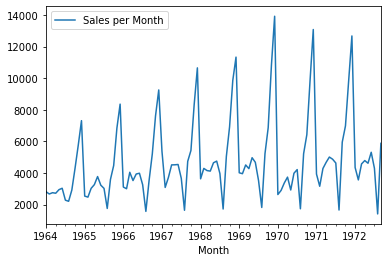

In [48]:
df.plot()

In [49]:
import statsmodels.api as sm

In [56]:
model=sm.tsa.statespace.SARIMAX(df['Sales per Month'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()

c:\users\rishabh\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\rishabh\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


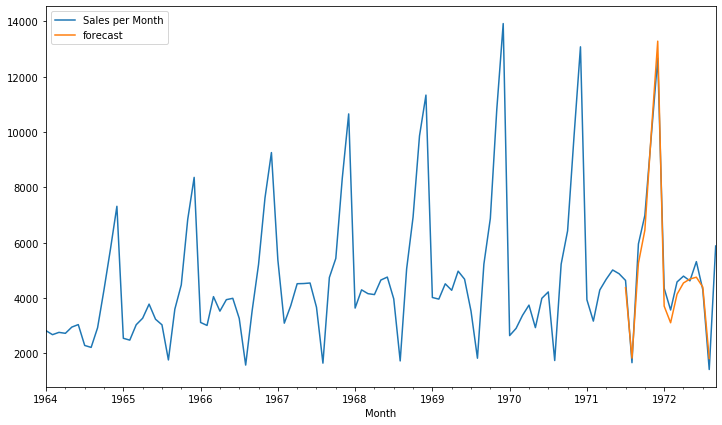

In [59]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales per Month','forecast']].plot(figsize=(12,7))

In [60]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [61]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [65]:
future_datest_df

,Sales per Month,forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN
1973-03-01,NaN,NaN
1973-04-01,NaN,NaN
1973-05-01,NaN,NaN
1973-06-01,NaN,NaN
1973-07-01,NaN,NaN


In [66]:

future_df=pd.concat([df,future_datest_df])

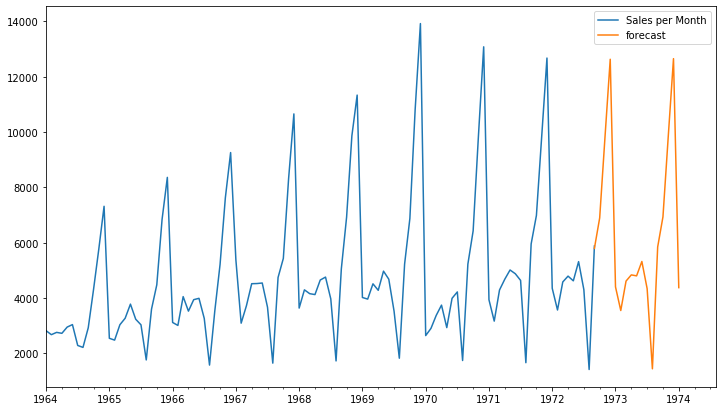

In [69]:

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales per Month', 'forecast']].plot(figsize=(12, 7))